In [ ]:
!pip install yfinance
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()

     |████████████████████████████████| 6.3 MB 7.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
BTC = pdr.get_data_yahoo("BTC-USD", start="2014-01-01", end="2021-10-31")
ETH = pdr.get_data_yahoo("ETH-USD", start="2014-01-01", end="2021-10-31")
DOGE = pdr.get_data_yahoo("DOGE-USD", start="2014-01-01", end="2021-10-31")
SP5 = pdr.get_data_yahoo("^GSPC", start="2014-01-01", end="2021-10-31")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
BTC.reset_index(level=0, inplace=True)
ETH.reset_index(level=0, inplace=True)
DOGE.reset_index(level=0, inplace=True)
SP5.reset_index(level=0, inplace=True)

In [ ]:
print(BTC.head(1))
print(ETH.head(1))
print(DOGE.head(1))
print(SP5.head(1))

        Date  Adj_Close_BTC
0 2014-09-17     457.334015
        Date  Adj_Close_ETH
0 2015-08-07        2.77212
        Date  Adj_Close_DOGE
0 2014-09-17        0.000268
            Adj_Close_SP5
Date                     
2014-01-02     1831.97998


In [ ]:
print(BTC.tail(1))
print(ETH.tail(1))
print(DOGE.tail(1))
print(SP5.tail(1))

           Date          Open  ...     Adj Close       Volume
2597 2021-10-31  61850.488281  ...  61318.957031  32241199927

[1 rows x 7 columns]
           Date         Open  ...    Adj Close       Volume
2273 2021-10-31  4322.744141  ...  4288.074219  17498160238

[1 rows x 7 columns]
           Date      Open      High       Low     Close  Adj Close      Volume
2597 2021-10-31  0.269239  0.284707  0.252614  0.280244   0.280244  4224104205
           Date         Open         High  ...        Close    Adj Close      Volume
1971 2021-10-29  4572.870117  4608.080078  ...  4605.379883  4605.379883  3632260000

[1 rows x 7 columns]


In [ ]:
BTC.describe

<bound method NDFrame.describe of            Date          Open  ...     Adj Close       Volume
0    2014-09-17    465.864014  ...    457.334015     21056800
1    2014-09-18    456.859985  ...    424.440002     34483200
2    2014-09-19    424.102997  ...    394.795990     37919700
3    2014-09-20    394.673004  ...    408.903992     36863600
4    2014-09-21    408.084991  ...    398.821014     26580100
...         ...           ...  ...           ...          ...
2593 2021-10-27  60352.000000  ...  58482.386719  43657076893
2594 2021-10-28  58470.730469  ...  60622.136719  45257083247
2595 2021-10-29  60624.871094  ...  62227.964844  36856881767
2596 2021-10-30  62239.363281  ...  61888.832031  32157938616
2597 2021-10-31  61850.488281  ...  61318.957031  32241199927

[2598 rows x 7 columns]>

In [ ]:
BTC.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#remove all columns but date and and 'adj close' 
BTC2 = BTC.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis =1)
ETH2 = ETH.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis =1)
DOGE2 = DOGE.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis =1)
SP52 = SP5.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis =1)

In [ ]:
BTC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2598 non-null   datetime64[ns]
 1   Adj Close  2598 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 40.7 KB


In [ ]:
ETH2.head(10)

,Date,Adj Close
0,2015-08-07,2.772120
1,2015-08-08,0.753325
2,2015-08-09,0.701897
3,2015-08-10,0.708448
4,2015-08-11,1.067860
5,2015-08-12,1.217440
6,2015-08-13,1.827670
7,2015-08-14,1.827870
8,2015-08-15,1.688900
9,2015-08-16,1.566030


In [ ]:
BTC = BTC2.rename(columns={"Adj Close":"Adj_Close_BTC"})
ETH = ETH2.rename(columns={"Adj Close":"Adj_Close_ETH"})
DOGE = DOGE2.rename(columns={"Adj Close":"Adj_Close_DOGE"})
SP5 = SP52.rename(columns={"Adj Close":"Adj_Close_SP5"})


In [ ]:
Merged = SP5.merge(ETH, how = 'outer', on = "Date")
Merged = Merged.merge(DOGE, how = 'outer', on = "Date")
Merged = Merged.merge(BTC, how = 'outer', on = "Date")


In [ ]:
Merged

,Date,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
0,2014-01-02,1831.979980,NaN,NaN,NaN
1,2014-01-03,1831.369995,NaN,NaN,NaN
2,2014-01-06,1826.770020,NaN,NaN,NaN
3,2014-01-07,1837.880005,NaN,NaN,NaN
4,2014-01-08,1837.489990,NaN,NaN,NaN
...,...,...,...,...,...
2775,2015-07-19,NaN,NaN,0.000169,273.614014
2776,2015-07-25,NaN,NaN,0.000188,288.696991
2777,2015-07-26,NaN,NaN,0.000187,292.686005
2778,2015-08-01,NaN,NaN,0.000175,281.601013


In [ ]:
Merged['Date']=pd.to_datetime(Merged.Date)

In [ ]:
Merged = Merged.sort_values('Date')

In [ ]:
Merged = Merged.set_index(Merged['Date'])

In [ ]:
Merged =Merged.drop('Date',axis=1)

In [ ]:
Merged

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Date,,,,
2014-01-02,1831.979980,NaN,NaN,NaN
2014-01-03,1831.369995,NaN,NaN,NaN
2014-01-06,1826.770020,NaN,NaN,NaN
2014-01-07,1837.880005,NaN,NaN,NaN
2014-01-08,1837.489990,NaN,NaN,NaN
...,...,...,...,...
2021-10-27,4551.680176,3930.257324,0.237690,58482.386719
2021-10-28,4596.419922,4287.318848,0.300447,60622.136719
2021-10-29,4605.379883,4414.746582,0.287853,62227.964844


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

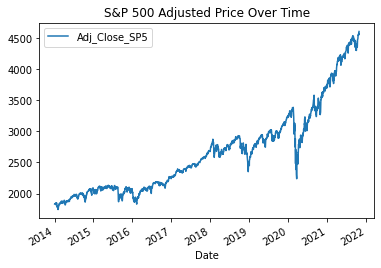

In [ ]:
SP5.plot(title="S&P 500 Adjusted Price Over Time")

In [ ]:
BTC['Date']=pd.to_datetime(BTC.Date)
BTC = BTC.sort_values('Date')
BTC =BTC.set_index(BTC['Date'])
BTC =BTC.drop('Date',axis=1)

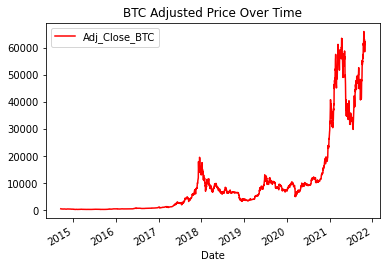

In [ ]:
BTC.plot(title="BTC Adjusted Price Over Time", color='red')

In [ ]:
ETH['Date']=pd.to_datetime(ETH.Date)
ETH = ETH.sort_values('Date')
ETH =ETH.set_index(ETH['Date'])
ETH =ETH.drop('Date',axis=1)

In [ ]:
DOGE['Date']=pd.to_datetime(DOGE.Date)
DOGE = DOGE.sort_values('Date')
DOGE =DOGE.set_index(DOGE['Date'])
DOGE =DOGE.drop('Date',axis=1)

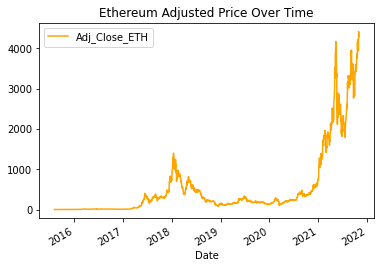

In [ ]:
ETH.plot(title="Ethereum Adjusted Price Over Time", color='orange')

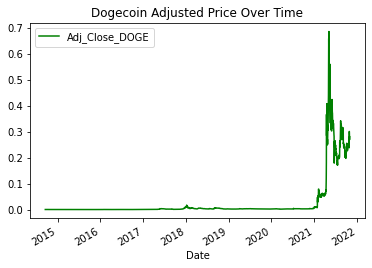

In [ ]:
DOGE.plot(title="Dogecoin Adjusted Price Over Time", color='green')